In my notes on [special relativity](./Special%20Relativity.ipynb) and the additional notes on [acceleration](./Special%20Relativity%20Acceleration.ipynb), we saw how events, velocities, and accelerations of objects transform between reference frames. In those notes, we were concerned only with singular non-interacting objects. Now I want to consider how objects can interact and apply forces upon each other in SR.

### Revisiting spacelike, timelike, and lightlike intervals

In the previous notes, we saw how to calculate a spacetime distance between two events, using the following formula (I've removed the $y$ and $z$ dimensions for simplicity).

$$ (d\tau)^2 = (dt)^2 - (\frac{1}{c}dx)^2 $$

We saw that there are three different categories of displacements between two events:

* Timelike, where $(d\tau)^2 > 0$
* Spacelike, where $(d\tau)^2 < 0$
* Lightlike, where $(d\tau)^2 = 0$

Below is a spacetime diagram showing each of these different catagories of displacements from the origin of the plot.

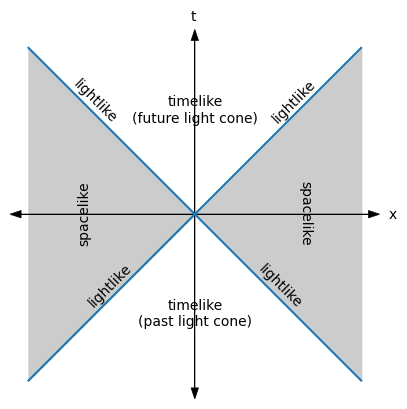

In [1]:
import matplotlib.pyplot as plt

plt.fill_between([-9, 0, 9], [9, 0, 9], [-9, 0, -9], color=(0.8, 0.8, 0.8))

plt.arrow(0, 0,  10, 0, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, -10, 0, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, 0,  10, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, 0, -10, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')

plt.plot([-9, 9, None, -9, 9], [-9, 9, None, 9, -9])

plt.text(5.4, 5, 'lightlike', horizontalalignment='center', rotation=45)
plt.text(-4.6, -5, 'lightlike', horizontalalignment='center', rotation=45)
plt.text(-5.4, 5, 'lightlike', horizontalalignment='center', rotation=-45)
plt.text(4.6, -5, 'lightlike', horizontalalignment='center', rotation=-45)

plt.text(0, 5, 'timelike\n(future light cone)', horizontalalignment='center')
plt.text(0, -6, 'timelike\n(past light cone)', horizontalalignment='center')
plt.text(6, -1.5, 'spacelike', horizontalalignment='center', rotation=-90)
plt.text(-6, -1.5, 'spacelike', horizontalalignment='center', rotation=90)

plt.text(10.5, -0.2, 'x')
plt.text(-0.2, 10.5, 't')

plt.axis('square')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax = plt.gca()
ax.axis('off')

plt.show()

As you can see, all the events on the plot that are at a lightlike displacement from the origin are along 45 degree angles with respect to the coordinate axes, because they fall along all the possible paths that a ray of light that intersects with the origin could take.

The events that are spacelike displaced from the origin are to the left and right sides, and the events that are timelike displaced from the origin are to the top and bottom.


### Light cones

The lightlike displaced events, all together, make up what is called the light cone of the event at the origin. It is called a cone because its shape in 2+1 spacetime is a 3-D cone. The part of the light cone that is on the negative side of the $t$-axis is called the past light cone, and on the positive side is the future light cone.



### Causality

Here's where causality comes into play: the volume of the past light cone contains all of the events which could possibly influence an object at the origin, and the volume of the future light cone contains all of the events which the object at the origin could possibly influence.

Anything that is spacelike displaced from the object at the origin cannot influence the object. Such an interaction would require information to travel faster than the speed of light, which is impossible.

This means that force laws like Newtonian gravity and Coulomb's law which use instantaneous action at a distance are not going to work in special relativity.

### Locality

Well then how can two particles interact? The answer is that particles can only indirectly interact through some medium which the particles each interact with locally. The effects that the particles have on this medium will propagate through spacetime at the speed of light.

For instance, if an electrically charged particle wiggles, it creates waves in the electromagnetic field. Those waves propagate at the speed of light. After some time, if those waves reach another charged particle, that particle then also wiggles.

Since the information that the first particle has started to wiggle moves through spacetime at the speed of light, then the event where the first particle starts to wiggle and the event where the second particle reacts and also starts to wiggle are lightlike displaced from each other.

### Concerns about simulation

Ok so if we want to simulate two or more particles interacting with each other through a field. How can we do that?

The option that seems pretty obvious is to create some sort of computational representation of a field. It would have a state that evolves over time according to field equations. But a field has a different value at each point in space, so the state of the field is actually infinitely large.

We could sacrifice some accuracy by approximating the continuous field with a discrete one. We could break space up into a finite number of cells that each has one corresponding value for the field. However, this solution doesn't seem very ideal to me--in order to calculate the motion particles accurately, it seems like it would require a large amount of cells. Each time step would require quite a lot of calculations, even if there are just two particles.

Another problem is that if we wanted to transform the whole system to a different reference frame, the sizes of the cells would change, and we would have to content with that somehow.


### Retarded potential

Thankfully there is a simpler way to go. It is possible to abstract away the details of the field. We can create an equation for the potential (and thus the force) that a particle A feels, depending on the state of another particle B. However, it won't depend on the state of particle B at the current time--instead it will depend on the state of particle B in the past, at the event where particle B intersects with particle A's past light cone.

An example of such a potential is the [Lienard-Wiechert potential](https://en.wikipedia.org/wiki/Li%C3%A9nard%E2%80%93Wiechert_potential) ([alternate article](<https://phys.libretexts.org/Bookshelves/Electricity_and_Magnetism/Essential_Graduate_Physics_-_Classical_Electrodynamics_(Likharev)/10%3A_Radiation_by_Relativistic_Charges/10.01%3A_Lienard-Wiechert_Potentials>)), which accurately represents the potential energy of an electromagnetic charge due to the interaction with source charges.

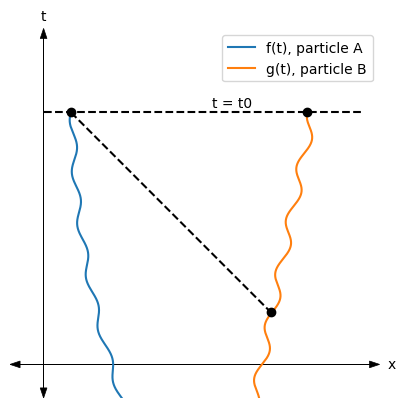

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.arrow(0, 0,  20, 0, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, -2, 0, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, 0,  20, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')
plt.arrow(0, 0, 0, -2, linewidth=0.5, head_width=0.4, length_includes_head=True, color='black')

t = np.linspace(-5, 15, 10_000)

x0 = 0.2 * np.sin(2 * t + .78) + 4 - 0.3 * t + 0.01 * t**2
x1 = 0.3 * np.sin(2 * t) + 13 + 0.2 * t

plt.plot(x0, t, label='f(t), particle A')
plt.plot(x1, t, label='g(t), particle B')
plt.plot(x0[-1], 15, 'o', color='black')
plt.plot(x1[-1], 15, 'o', color='black')


plt.text(10, 15.3, 't = t0')
plt.plot([0, 19], [15, 15], linestyle='dashed', color='black')

#plt.text(4, 8, 'x = f(t0) + c(t0 - t)', rotation=-45)
plt.plot([1.63, 13.53], [15, 3.1], linestyle='dashed', color='black')
plt.plot(13.53, 3.1, 'o', color='black')


plt.text(20.5, -0.2, 'x')
plt.text(-0.2, 20.5, 't')

plt.axis('square')
plt.xlim(-2, 20)
plt.ylim(-2, 20)
ax = plt.gca()
ax.axis('off')
plt.legend()

plt.show()

Above is a made up example of a spacetime diagram containing the worldlines of two particles.

Imagine we're trying to find the force on particle A at time $t = t_0$ due to some interaction with particle B. As we mentioned before, the force equation won't depend on the state of particle B at time $t = t_0$. Instead, it will depend on B's state at some earlier event where its worldline intersects with particle A's past light cone. So we start at particle A, at the coordinates $(t_0, f(t_0))$, and draw a ray of light going backward in time toward particle B.